# Univariate Time Series

## import

In [2]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

## data loading

In [3]:
# Load dataset langsung dari Google Drive
df = pd.read_csv('https://drive.google.com/uc?id=15RfMD9lNkpS3cVN7j3_dsJKZ8_5RJG5z')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [5]:
dates = df['date'].values
temp  = df['meantemp'].values

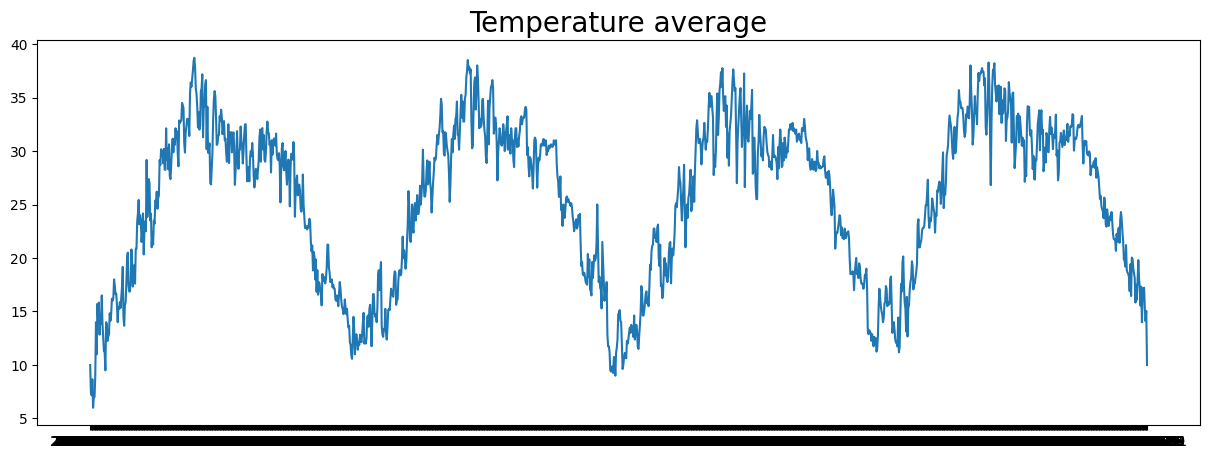

In [6]:
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

## prepreprocessing

In [12]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size+1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:1], w[-1:]))

    return ds.batch(batch_size).prefetch(1)

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):ini adalah definisi fungsi windowed_dataset yang menerima empat parameter:
1. series: data deret waktu.
2. window_size: ukuran jendela (window) yang akan digunakan.
3. batch_size: ukuran batch.
4. shuffle_buffer: ukuran buffer untuk pengacakan (shuffle).

**series = tf.expand_dims(series, axis=-1):**
mengubah dimensi series dengan menambahkan satu dimensi baru di posisi terakhir (axis=-1). Ini biasanya dilakukan untuk menangani data deret waktu yang memiliki satu dimensi (misalnya, satu fitur. Pada kasus ini meantemp).

**ds = tf.data.Dataset.from_tensor_slices(series)**: membuat dataset TensorFlow menjadi sebuah series. Dataset ini berisi slice dari series dimana setiap slice sesuai dengan satu elemen dalam series.

**ds = ds.flat_map(lambda w: w.batch(window_size + 1))**: mengubah setiap window menjadi sebuah batch dengan ukuran window_size + 1. Ini dilakukan menggunakan flat_map yang menjalankan fungsi yang diberikan pada setiap elemen dataset dan kemudian menggabungkan hasilnya.

**ds = ds.shuffle(shuffle_buffer)**: mengacak dataset dengan menggunakan buffer ukuran shuffle_buffer. Ini akan mengacak elemen-elemen dataset, yang berguna untuk memperkenalkan variasi dalam pelatihan model.

**ds = ds.map(lambda w: (w[:-1], w[-1:]))**: memetakan setiap batch menjadi sepasang data input dan target. Data input adalah semua elemen dalam batch kecuali elemen terakhir, sedangkan targetnya adalah elemen terakhir. Ini digunakan untuk melatih model untuk memprediksi elemen berikutnya dalam deret waktu berdasarkan elemen-elemen sebelumnya.

**return ds.batch(batch_size).prefetch(1)**: mengelompokkan batch-batch dataset menjadi batch dengan ukuran batch_size, dan menambahkan prefetching ke dataset. Prefetching memungkinkan TensorFlow untuk memuat data selanjutnya ke dalam memori ketika model sedang melakukan komputasi sehingga dapat meningkatkan kinerja. Dengan nilai argumen 1, prefetch akan memastikan bahwa satu batch selalu siap untuk diproses oleh model.

In [14]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(60, return_sequences=True),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1),
])

In [15]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

Epoch 1/100


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 25.3711 - mae: 25.8711
Epoch 2/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - loss: 24.8983 - mae: 25.3983

c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.3486 - mae: 25.8486 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.2477 - mae: 25.7477 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25.1869 - mae: 25.6869
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 25.1516 - mae: 25.6516
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.1555 - mae: 25.6555 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.7696 - mae: 25.2696 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.2822 - mae: 25.7822 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.4248 - mae: 25.9248 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.0969 - mae: 25.5969 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 24.9919 - mae: 25.4919 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.9883 - mae: 25.4883 
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.0976 - mae: 25.5976 
Epoch 14/100


In [16]:
# predic fungsi
forecast = history.model.predict(train_set)
forecast

15/15 ━━━━━━━━━━━━━━━━━━━━ 49s 24ms/step


c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


array([[28.857265],
       [24.955301],
       [28.396461],
       ...,
       [25.340445],
       [28.137318],
       [28.561987]], dtype=float32)

# Multivariate Time Series

adalah rangkaian data dimana setiap titik terdiri sari beberap avariabel yang diukut secara bersamaan dalam interval waktu yang berurutan

In [17]:
import pandas as pd
import tensorflow as tf

In [18]:
df = pd.read_csv('https://drive.google.com/uc?id=1AZRfFoyekqSYpri5183RmJjciRGz_ood', sep=',',
                     infer_datetime_format=True, index_col='datetime', header=0)
df

C:\Users\rasyid\AppData\Local\Temp\ipykernel_17964\513246612.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('https://drive.google.com/uc?id=1AZRfFoyekqSYpri5183RmJjciRGz_ood', sep=',',


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2007-02-14 17:19:00,0.636,0.140,241.16,2.6,0.0,0.0,0.0
2007-02-14 17:20:00,0.552,0.000,240.46,2.2,0.0,0.0,0.0
2007-02-14 17:21:00,0.538,0.000,239.74,2.2,0.0,0.0,0.0


In [19]:
# melakukan normalisasi
def normalize_series(data, min, max):
    data = data - min
    data = data / max
    return data

data = df.values
data = normalize_series(data, data.min(axis=0), data.max(axis=0))

In [20]:
N_FEATURES = len(df.columns)

In [21]:
SPLIT_TIME = int(len(data) * 0.5)
x_train = data[:SPLIT_TIME]
x_valid = data[SPLIT_TIME:]

Kode di atas akan memisahkan data menjadi dua bagian yaitu 50% untuk data latih dan 50% sisanya untuk data uji. Seperti yang Anda ingat, jumlah data yang ada pada kasus ini adalah 86.400 baris sehingga dengan menjalankan kode di atas kita akan membagi masing-masing data menjadi 43.200 baris. 

In [23]:
# fungsi windor

def windowed_dataset(series, batch_size, n_past=24, n_future=24, shift=1):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(size=n_past + n_future, shift=shift, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(n_past + n_future))
    ds = ds.map(lambda w: (w[:n_past], w[n_past:]))
    return ds.batch(batch_size).prefetch(1)

- **def windowed_dataset(series, batch_size, n_past=24, n_future=24, shift=1)**: ini adalah definisi dari fungsi windowed_dataset. Fungsi ini memiliki beberapa argumen:
1. series: data berurutan yang akan diproses.
2. batch_size: ukuran batch yang akan digunakan dalam dataset.
3. n_past: jumlah waktu ke belakang yang akan dipertimbangkan sebagai input. 
4. n_future: jumlah waktu ke depan yang akan dipertimbangkan sebagai output yang diinginkan.
5. shift: perpindahan (shift) dalam jumlah waktu saat membuat jendela waktu.
Nah, seperti yang Anda lihat perbedaannya terdapat pada ketiga argumen terakhir. Nantinya kita akan membahas lebih detail terkait tiga argumen tersebut. Jadi, tahan dahulu rasa penasarannya.
- **ds = tf.data.Dataset.from_tensor_slices(series)**: membuat dataset TensorFlow dari array series menggunakan from_tensor_slices. Setiap elemen dalam dataset ini akan menjadi elemen dalam array series.
- **ds = ds.window(size=n_past + n_future, shift=shift, drop_remainder=True)**: fungsi window yang digunakan di sini untuk membagi dataset menjadi jendela waktu. Argumen size menentukan ukuran jendela (jumlah waktu ke belakang dan ke depan), shift menentukan pergeseran dalam waktu antara jendela, dan drop_remainder=True menghapus bagian dari dataset yang tidak cukup besar untuk membentuk jendela penuh.
- **ds = ds.flat_map(lambda w: w.batch(n_past + n_future))**: fungsi flat_map digunakan untuk mengaplikasikan fungsi lambda ke setiap elemen jendela dalam dataset dan kemudian menggabungkan hasilnya. Di sini, fungsi lambda mengelompokkan elemen-elemen dalam setiap jendela ke dalam batch dengan ukuran n_past + n_future.
- **ds = ds.map(lambda w: (w[:n_past], w[n_past:]))**: setiap batch dalam dataset sekarang berisi window/jendela yang berisikan n_past titik data waktu sebelumnya dan n_future titik data waktu setelahnya. Dalam langkah ini, setiap batch diubah menjadi pasangan input-output, di mana inputnya adalah data waktu sebelumnya (sepanjang n_past) dan outputnya adalah data waktu setelahnya (sepanjang n_future).
- **return ds.batch(batch_size).prefetch(1)**: Akhirnya, dataset dipecah menjadi batch-batch dengan ukuran batch_size, kemudian dioptimalkan untuk performa dengan memuat data dalam batch menggunakan prefetch(1). Ini berarti saat satu batch sedang diproses oleh model, TensorFlow sudah memuat batch berikutnya untuk diproses sehingga akan meningkatkan penggunaan CPU/GPU dengan lebih efisien.

In [24]:
BATCH_SIZE = 32
N_PAST = 24
N_FUTURE = 24
SHIFT = 1
# Kode untuk membuat windowed datasets
train_set = windowed_dataset(series=x_train, batch_size=BATCH_SIZE,
                                 n_past=N_PAST, n_future=N_FUTURE,
                                 shift=SHIFT)
valid_set = windowed_dataset(series=x_valid, batch_size=BATCH_SIZE,
                                 n_past=N_PAST, n_future=N_FUTURE,
                                 shift=SHIFT)

In [25]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, input_shape=(N_PAST, N_FEATURES)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(N_FEATURES)
    ])

c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# menggunakan hyperparameter callback

class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if (logs.get('mae') < 0.055 and logs.get('val_mae') < 0.055):
                self.model.stop_training = True
 
callbacks = myCallback()

In [28]:
# Kode untuk melakukan menyusun struktur sesuai dengan machine learning
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3) 
model.compile(loss='mae',
                  optimizer= optimizer,
                  metrics=["mae"])

In [29]:
model.fit(train_set,
          validation_data=(valid_set),
          epochs=100,
          callbacks=callbacks,
          verbose=1
    )

Epoch 1/100
   1338/Unknown 7s 4ms/step - loss: 0.0806 - mae: 0.0806

c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1349/1349 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0804 - mae: 0.0804 - val_loss: 0.0595 - val_mae: 0.0595
Epoch 2/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.0610 - mae: 0.0610 - val_loss: 0.0609 - val_mae: 0.0609
Epoch 3/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.0600 - mae: 0.0600 - val_loss: 0.0591 - val_mae: 0.0591
Epoch 4/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0593 - mae: 0.0593 - val_loss: 0.0595 - val_mae: 0.0595
Epoch 5/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0590 - mae: 0.0590 - val_loss: 0.0595 - val_mae: 0.0595
Epoch 6/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0586 - mae: 0.0586 - val_loss: 0.0569 - val_mae: 0.0569
Epoch 7/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 0.0582 - mae: 0.0582 - val_loss: 0.0600 - val_mae: 0.0600
Epoch 8/100
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - loss: 0.0582 - mae: 0.0582 - val_loss: 0.0568 - val_mae: 0.0568
Epoch 9/100
1349/1349 ━━━━━━━━━━

1. train_set: ini adalah dataset yang digunakan untuk pelatihan model. Dataset ini berisi pasangan data fitur dan label yang akan digunakan untuk melatih model.
2. validation_data=(valid_set): argumen ini menunjukkan dataset validasi yang akan digunakan untuk mengevaluasi kinerja model pada setiap epoch selama pelatihan. Dataset validasi ini berisi pasangan data fitur dan label yang berbeda dari data pelatihan dan digunakan untuk menghindari overfitting. valid_set adalah dataset validasi yang diberikan dan akan diuji oleh model yang dibangun.
3. epochs=100: ini adalah jumlah epoch yang akan digunakan untuk melatih model. Epoch adalah satu putaran penuh melalui seluruh dataset pelatihan.
callbacks=callbacks: ini adalah argumen yang digunakan untuk memberikan callbacks ke model. Di sini, callbacks adalah objek yang telah dibuat sebelumnya yang berisi definisi dari callback berdasarkan modifikasi myCallback. Callback ini akan dipanggil pada akhir setiap epoch selama pelatihan dan akan menghentikan pelatihan jika kriteria yang ditentukan terpenuhi.
4. verbose=1:argumen ini menentukan tingkat kecerewetan (verbosity) selama pelatihan dengan ketentuan sebagai berikut. 
- Verbose = 0 berarti ketika training tidak menampilkan status atau log sama sekali.
- Verbose = 1 berarti akan memunculkan semacam progress bar menunjukkan nilai dari epoch dan step keberapa dengan detail.
- Verbose = 2 berarti hanya memunculkan progress secara singkat seperti “1/64 Epoch” atau dalam kata lain hanya memperlihatkan data satu baris per epochs.

In [32]:
# melakuakn prediksi
from array import array
train_pred = model.predict(train_set)
train_pred[0][0]
# Output
np.array([ 3.8611603e-01,  2.5834844e-01,  2.5597256e-02,  3.8636056e-01,
       -4.1037248e-04,  1.7979867e-03,  8.6604381e-01], dtype=float32)

1349/1349 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


NameError: name 'float32' is not defined